<div style="text-align: center; color: #ffffff; font-family: Babas; font-size: 3em;">01. GRABEN - MONTESANTO</div>
<div style="text-align: left; color: #ffffff; font-family: Babas; font-size: 2.5em;">DESCRIPCIÓN</div>
<div style="text-align: left; color: #ffffff; font-family: Babas; font-size: 2em; border-bottom: 1px solid white;">Información obtenida de un corte geológico suroeste-noreste, ubicado en la plancha 39 – El Difícil. El modelo muestra un graben ocasionado por la falla normal Montesanto y otra falla que no aflora en superficie.  Este movimiento extensional afecta a las formaciones sedimentarias (areniscas) de Zambrano (N2z), Jesús del Monte (N1jm) compuesta por lodolitas, Rancho (N1r) y Ciénaga de Oro (E3N1co).  </div>

In [2]:
import gempy as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pyvista
import warnings
import pickle
from discretize.utils import mkvc, active_from_xyz
from discretize import TensorMesh

Setting Backend To: AvailableBackends.numpy


In [3]:
orientations_path = "Orientaciones_GRABEN_VIM.txt"
surfaces_path     = "Superficie_GRABEN_VIM.txt"
geo_model = gp.create_geomodel(
    project_name='geo_model',
    extent=[0, 10000, 0, 1000, -3500, 0],
    resolution=[100, 50, 50],
    importer_helper=gp.data.ImporterHelper(
        path_to_orientations=orientations_path,
        path_to_surface_points=surfaces_path
    )
)

In [4]:
geo_model.surface_points_copy

X,Y,Z,id,nugget
10280.53,0.00,-2404.26,56869579,0.00
9872.15,0.00,-2598.22,56869579,0.00
9656.45,0.00,-2671.52,56869579,0.00
9378.34,0.00,-2805.86,56869579,0.00
9030.92,0.00,-2973.69,56869579,0.00
8848.85,0.00,-3061.65,56869579,0.00
8670.03,0.00,-3122.05,56869579,0.00
8479.33,0.00,-3186.47,56869579,0.00
8273.56,0.00,-3288.55,56869579,0.00
8005.79,0.00,-3398.78,56869579,0.00


In [5]:
geo_model.orientations_copy

X,Y,Z,G_x,G_y,G_z,id,nugget
9030.92,0.00,-2973.69,-0.44,-0.00,0.90,56869579,0.01
3533.33,0.00,-2201.56,0.42,0.00,0.91,151494913,0.01
4940.49,0.00,-891.69,-0.03,-0.00,1.00,254052602,0.01
4280.22,0.00,-2674.00,-0.26,-0.00,0.97,314986376,0.01
5409.33,0.00,-2896.28,0.00,0.00,1.00,314986376,0.01
4841.97,0.00,-316.53,-0.03,-0.00,1.00,411934884,0.01


In [6]:
geo_model.structural_frame.surfaces

[Element(
 	name=Falla2,
 	color=#015482,
 	is_active=True
 ),
 Element(
 	name=FallaMontesanto,
 	color=#9f0052,
 	is_active=True
 ),
 Element(
 	name=N1jm,
 	color=#ffbe00,
 	is_active=True
 ),
 Element(
 	name=N1r,
 	color=#728f02,
 	is_active=True
 ),
 Element(
 	name=N2z,
 	color=#443988,
 	is_active=True
 ),
 Element(
 	name=basement,
 	color=#ff3f20,
 	is_active=True
 )]

In [7]:
gp.map_stack_to_surfaces(geo_model,
                         {"FallaMontesanto":('FallaMontesanto'),
                          "Falla2":('Falla2'),
                          "Strat_Series": ('N2z', 'N1jm','N1r')})

StructuralFrame(
	structural_groups=[
StructuralGroup(
	name=FallaMontesanto,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=FallaMontesanto,
	color=#9f0052,
	is_active=True
)
]
),
StructuralGroup(
	name=Falla2,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=Falla2,
	color=#015482,
	is_active=True
)
]
),
StructuralGroup(
	name=Strat_Series,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=N2z,
	color=#443988,
	is_active=True
),
Element(
	name=N1jm,
	color=#ffbe00,
	is_active=True
),
Element(
	name=N1r,
	color=#728f02,
	is_active=True
)
]
)
],
	fault_relations=
[[False, False, False],
 [False, False, False],
 [False, False, False]],

In [8]:
#geo_model.rename_surfaces({'basement':'E3N1co'})
frame = geo_model.structural_frame

# Option A: find index and set the name
idx = frame.elements_names.index('basement')   # raises ValueError if not found
frame.structural_elements[idx].name = 'E3N1co'

# Option B: iterate and set when match (safer if name may not exist)
for el in frame.structural_elements:
    if el.name == 'basement':
        el.name = 'E3N1co'
        break

In [9]:
geo_model.structural_frame.surfaces

[Element(
 	name=FallaMontesanto,
 	color=#9f0052,
 	is_active=True
 ),
 Element(
 	name=Falla2,
 	color=#015482,
 	is_active=True
 ),
 Element(
 	name=N2z,
 	color=#443988,
 	is_active=True
 ),
 Element(
 	name=N1jm,
 	color=#ffbe00,
 	is_active=True
 ),
 Element(
 	name=N1r,
 	color=#728f02,
 	is_active=True
 ),
 Element(
 	name=basement,
 	color=#ff3f20,
 	is_active=True
 )]

In [10]:
#geo_model.set_is_fault(['FallaMontesanto'])
#geo_model.set_is_fault(['Falla2'])
gp.set_is_fault(geo_model, ['FallaMontesanto'])
gp.set_is_fault(geo_model, ['Falla2'])

# or pass the structural_frame explicitly
gp.set_is_fault(frame=geo_model.structural_frame, fault_groups=['FallaMontesanto'])

StructuralFrame(
	structural_groups=[
StructuralGroup(
	name=FallaMontesanto,
	structural_relation=StackRelationType.FAULT,
	elements=[
Element(
	name=FallaMontesanto,
	color=#527682,
	is_active=True
)
]
),
StructuralGroup(
	name=Falla2,
	structural_relation=StackRelationType.FAULT,
	elements=[
Element(
	name=Falla2,
	color=#527682,
	is_active=True
)
]
),
StructuralGroup(
	name=Strat_Series,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=N2z,
	color=#443988,
	is_active=True
),
Element(
	name=N1jm,
	color=#ffbe00,
	is_active=True
),
Element(
	name=N1r,
	color=#728f02,
	is_active=True
)
]
)
],
	fault_relations=
[[False, False,  True],
 [False, False,  True],
 [False, False, False]],

In [23]:
#geo_model.faults.faults_relations_df
print("group_is_fault:", geo_model.structural_frame.group_is_fault)

# Inspect the fault relations matrix (numpy array)
print("fault_relations (matrix):\n", geo_model.structural_frame.fault_relations)

# You can iterate structural groups for more detail:
for g in geo_model.structural_frame.structural_groups:
    print("Group:", g.name)
    print("  structural_relation:", g.structural_relation)
    print("  is_fault (property):", getattr(g, "is_fault", None))
    print("  fault_relations (group-level):", getattr(g, "fault_relations", None))
    print("  faults_input_data:", getattr(g, "faults_input_data", None))

group_is_fault: [True, True, False]
fault_relations (matrix):
 [[False False  True]
 [False False  True]
 [False False False]]
Group: FallaMontesanto
  structural_relation: StackRelationType.FAULT
  is_fault (property): True
  fault_relations (group-level): FaultsRelationSpecialCase.OFFSET_FORMATIONS
  faults_input_data: None
Group: Falla2
  structural_relation: StackRelationType.FAULT
  is_fault (property): True
  fault_relations (group-level): FaultsRelationSpecialCase.OFFSET_FORMATIONS
  faults_input_data: None
Group: Strat_Series
  structural_relation: StackRelationType.ERODE
  is_fault (property): False
  fault_relations (group-level): None
  faults_input_data: None


In [24]:
geo_model.grid

Grid(values=array([[   50.,    10., -3465.],
       [   50.,    10., -3395.],
       [   50.,    10., -3325.],
       ...,
       [ 9950.,   990.,  -175.],
       [ 9950.,   990.,  -105.],
       [ 9950.,   990.,   -35.]]), length=array([], dtype=float64), _octree_grid=None, _dense_grid=RegularGrid(resolution=array([100,  50,  50]), extent=array([    0., 10000.,     0.,  1000., -3500.,     0.]), values=array([[   50.,    10., -3465.],
       [   50.,    10., -3395.],
       [   50.,    10., -3325.],
       ...,
       [ 9950.,   990.,  -175.],
       [ 9950.,   990.,  -105.],
       [ 9950.,   990.,   -35.]]), mask_topo=array([], shape=(0, 3), dtype=bool), _transform=None), _custom_grid=None, _topography=None, _sections=None, _centered_grid=None, _transform=None, _octree_levels=-1)

In [11]:
'''
gp.set_interpolator(
    geo_model,
    output=['geology'],
   
    theano_optimizer='fast compile')
'''
import gempy as gp
from gempy.core.data import GemPyEngineConfig, AvailableBackends

# assume geo_model already exists and you have added data (points/orientations)
# e.g. geo_model = gp.create_model('model_name'); gp.init_data(...)

# choose legacy backend (closest to old theano behavior)


# compute the model (this does the interpolation / builds the internal interpolator)
solutions = gp.compute_model(geo_model)


Setting Backend To: AvailableBackends.numpy
Chunking done: 35 chunks


c:\Users\torre\anaconda3\envs\mode\Lib\site-packages\gempy_engine\modules\activator\_soft_segment.py:95: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + bt.t.exp(x))


Chunking done: 13 chunks
Chunking done: 89 chunks
Chunking done: 12 chunks


c:\Users\torre\anaconda3\envs\mode\Lib\site-packages\gempy_engine\modules\activator\_soft_segment.py:95: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + bt.t.exp(x))
c:\Users\torre\anaconda3\envs\mode\Lib\site-packages\gempy_engine\modules\activator\_soft_segment.py:95: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + bt.t.exp(x))


c:\Users\torre\anaconda3\envs\mode\Lib\site-packages\gempy_viewer\API\_plot_2d_API.py:176: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


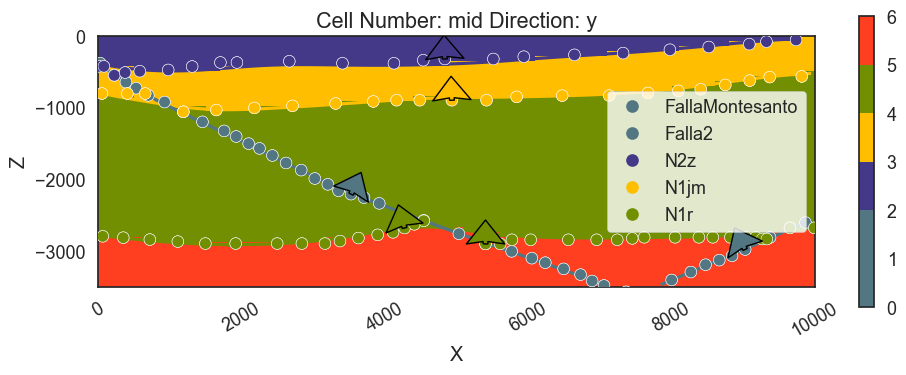

In [13]:
import gempy_viewer as gpv   # <- viewer module

# <-- assume geo_model already exists and you've run gp.compute_model(geo_model) -->
# e.g.
# geo_model = gp.create_model('my_model')
# gp.init_data(geo_model, ....)
# gp.compute_model(geo_model)

# now call the viewer 2D plot function
plot_obj = gpv.plot_2d(geo_model, show_data=True)
#gp.plot_2d(geo_model, show_data=True)
#plt.show()

In [30]:
geo_model.solutions

Solutions(4 Octree Levels, 5 DualContouringMeshes)

### 2D MODEL SECTION

/home/ana/anaconda3/envs/gempyv2/lib/python3.10/site-packages/gempy/plot/plot_api.py:261: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


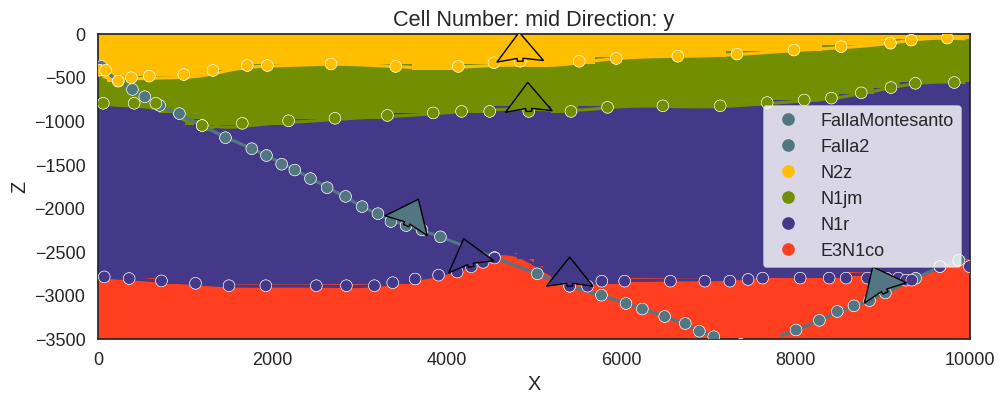

In [ ]:
gp.plot_2d(geo_model, show_data=True)
plt.savefig('section_2D.png', dpi=300, bbox_inches='tight')
plt.show()

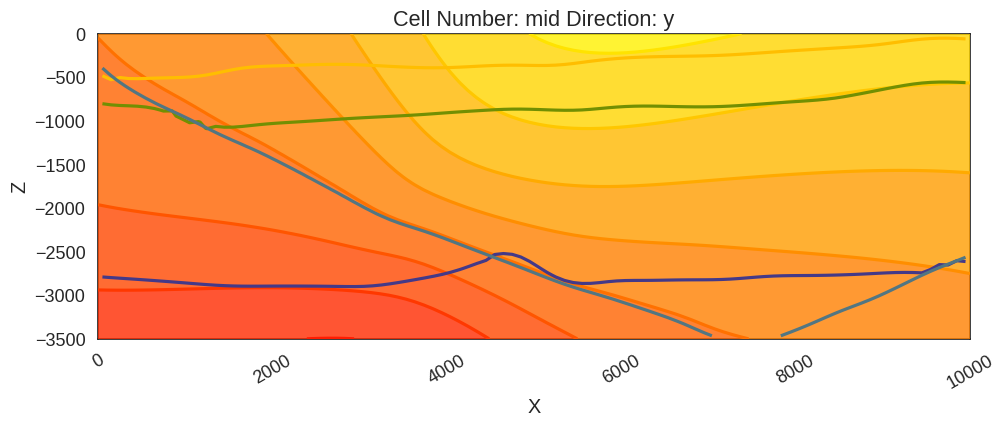

In [77]:
gp.plot_2d(geo_model, show_data=False, show_scalar=True, show_lith=False)
plt.show()

/home/ana/anaconda3/envs/gempyv2/lib/python3.10/site-packages/gempy/plot/plot_api.py:261: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


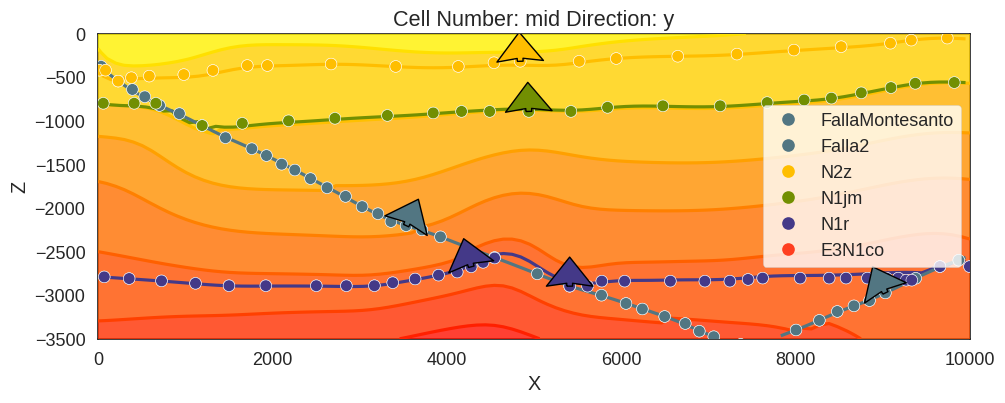

In [78]:
gp.plot_2d(geo_model, series_n=2, show_data=True, show_scalar=True, show_lith=False)
plt.show()

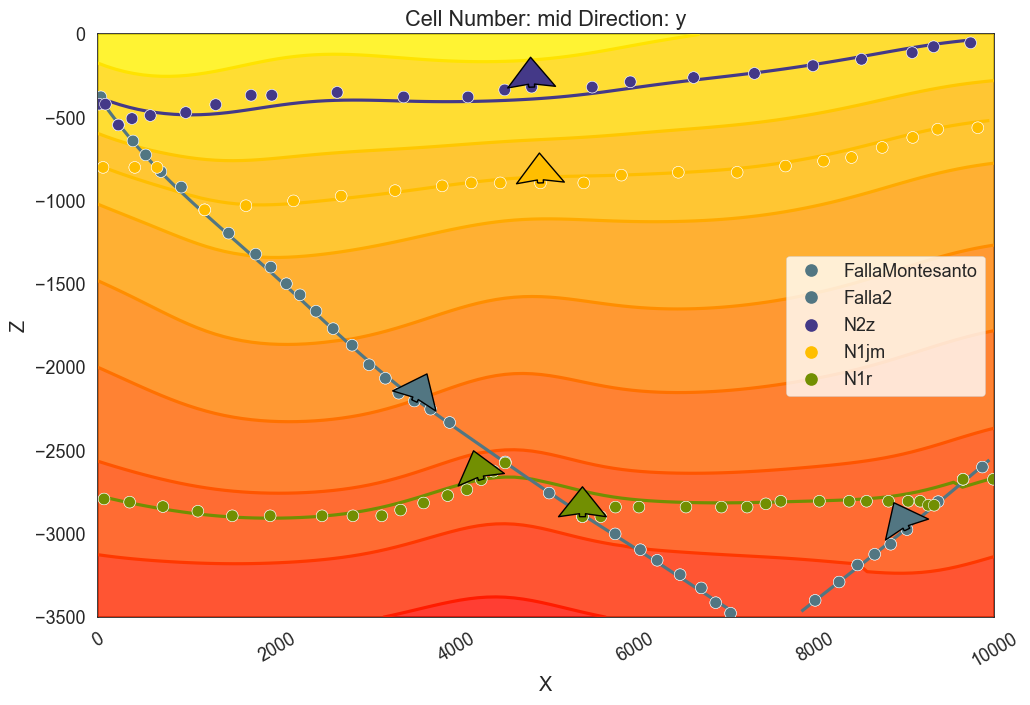

In [8]:
import gempy_viewer as gpv   # <- viewer module

# <-- assume geo_model already exists and you've run gp.compute_model(geo_model) -->
# e.g.
# geo_model = gp.create_model('my_model')
# gp.init_data(geo_model, ....)
# gp.compute_model(geo_model)

# now call the viewer 2D plot function
plot_obj = gpv.plot_2d(geo_model, series_n=2, show_data=True, show_scalar=True, show_lith=False)

### 3D GEOLOGICAL MODEL

In [14]:
import os
from pathlib import Path
import tempfile

# make a temp dir on the same drive as the current working directory
cwd_drive = Path.cwd().drive  # e.g. 'D:'
tmp_root = Path(f"{cwd_drive}\\Temp\\pyvista_tmp")
tmp_root.mkdir(parents=True, exist_ok=True)

# set environment variables so Python and libraries use this temp dir
os.environ['TMP'] = str(tmp_root)
os.environ['TEMP'] = str(tmp_root)
os.environ['TMPDIR'] = str(tmp_root)

# verify
import tempfile
print("new tempdir:", tempfile.gettempdir())

new tempdir: C:\Users\torre\AppData\Local\Temp


In [17]:
import os, tempfile
from pathlib import Path

print("cwd:", os.getcwd(), " -> drive:", Path(os.getcwd()).drive)
print("tempdir:", tempfile.gettempdir(), " -> drive:", Path(tempfile.gettempdir()).drive)

cwd: d:\9081\modelamiento\models  -> drive: d:
tempdir: C:\Users\torre\AppData\Local\Temp  -> drive: C:


In [14]:
import os, tempfile
from pathlib import Path

td = Path(tempfile.gettempdir()).drive  # e.g. 'C:'
os.chdir(td + os.sep)   # change CWD to root of temp drive
print("cwd after change:", os.getcwd())

# now call the plot
import gempy_viewer as gpv
gpv_obj = gpv.plot_3d(geo_model, image=False, plotter_type='basic')

cwd after change: C:\


c:\Users\torre\anaconda3\envs\mode\Lib\site-packages\gempy_viewer\modules\plot_3d\drawer_surfaces_3d.py:38: PyVistaDeprecationWarning: 
Users/torre/anaconda3/envs/mode/Lib/site-packages/gempy_viewer/modules/plot_3d/drawer_surfaces_3d.py:38: Argument 'color' must be passed as a keyword argument to function 'BasePlotter.add_mesh'.
From version 0.50, passing this as a positional argument will result in a TypeError.
  gempy_vista.surface_actors[element.name] = gempy_vista.p.add_mesh(


In [15]:
import pickle
from pathlib import Path

home = Path.home()
out = home / "graben_VIM.p"

with out.open("wb") as f:
    pickle.dump(geo_model, f, protocol=pickle.HIGHEST_PROTOCOL)

print("Saved to", out)

Saved to C:\Users\torre\graben_VIM.p


In [25]:
import os, pickle, tempfile, sys

def diagnose_and_save(obj, filename="graben_VIM.p"):
    cwd = os.getcwd()
    print("Current working dir:", cwd)
    home = os.path.expanduser("~")
    print("Home dir:", home)
    try_paths = [
        os.path.join(cwd, filename),                   # current dir
        os.path.join(home, filename),                  # user home
        os.path.join(tempfile.gettempdir(), filename)  # system temp
    ]
    for p in try_paths:
        print("\nTesting path:", p)
        print("  exists:", os.path.exists(p))
        # check whether path is directory (common mistake)
        if os.path.isdir(p):
            print("  -> path is a directory (can't write as file).")
            continue
        # check write access to directory
        dirpath = os.path.dirname(p) or "."
        print("  directory writable (os.access):", os.access(dirpath, os.W_OK))
        try:
            # attempt to write via context manager
            with open(p, "wb") as f:
                pickle.dump(obj, f, protocol=pickle.HIGHEST_PROTOCOL)
            print("  SUCCESS: wrote file to", p)
            return p
        except PermissionError as e:
            print("  PermissionError:", e)
        except Exception as e:
            print("  Other exception while writing:", type(e).__name__, e)
    raise RuntimeError("All attempts to save failed. Check folder permissions, antivirus, or run with elevated rights.")

# Example usage:
# saved_path = diagnose_and_save(geo_model)
# print("Saved at:", saved_path)

In [3]:
# load the model to check its ok
modelo = pickle.load(open(r"D:\9081\modelamiento\models\graben_VIM.p", "rb"))

# B. ASSIGNMENT OF GEOPHYSICAL PROPERTIES

In [ ]:
modelo.structural_frame.surfaces

## Magnetotellurics


Usando estas columnas como X, Y, Z: ['ID', 'X_m', 'Y_m', 'Z_m']


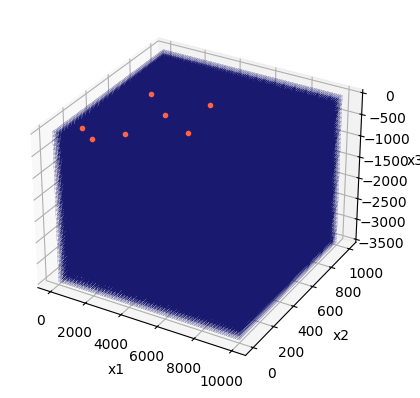

In [6]:
import pandas as pd
import numpy as np

# leer archivo
datos = pd.read_csv(r"D:\9081\modelamiento\models\topografiamt_15.csv", sep=',')

# tomar las primeras 3 columnas (X, Y, Z) — comprobar que existan
columnas = datos.columns.tolist()[:4]
if len(columnas) < 3:
    raise ValueError(f"Se esperaban al menos 3 columnas (X,Y,Z). Columnas encontradas: {len(columnas)} -> {datos.columns.tolist()}")

print(f"\nUsando estas columnas como X, Y, Z: {columnas}")

# usar índices 0,1,2 (no 1,2,3)
x_topo = datos[columnas[1]].values
y_topo = datos[columnas[2]].values
z_topo = datos[columnas[3]].values
topo_xyz = np.column_stack((x_topo, y_topo, z_topo))

dx = 100
ncx = 100
dy = 10
ncy = 100
dz = 100
ncz = 35


hx = [(dx, ncx)]
hy = [(dy, ncy)]
hz = [(dz, ncz)]
grid = TensorMesh([hx, hy, hz], x0=[0,0,-3500])
# cell_centers = meshes.cell_centers
# xy_ravel=cell_centers
                           
grid.plot_grid(color="midnightblue", linewidth=0.1)
plt.plot(x_topo, y_topo, z_topo, '.', color='tomato')

In [ ]:
sol_block = gp.compute_model_at(modelo, grid.gridCC)

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import discretize
from simpeg import utils
from simpeg.electromagnetics import natural_source as NSEM
from simpeg import maps

# ========================================
# 1. Leer topografía
# ========================================
datos = pd.read_csv(r"D:\9081\modelamiento\models\topografiamt_15.csv", sep=',')
columnas = datos.columns.tolist()[:4]
if len(columnas) < 3:
    raise ValueError(f"Se esperaban al menos 3 columnas (X,Y,Z). Columnas encontradas: {len(columnas)} -> {datos.columns.tolist()}")

x_topo = datos[columnas[1]].values
y_topo = datos[columnas[2]].values
z_topo = datos[columnas[3]].values
topo_xyz = np.column_stack((x_topo, y_topo, z_topo))

# ========================================
# 2. Crear la malla (igual que gravimetría)
# ========================================
dx, dy, dz = 100, 10, 100
ncx, ncy, ncz = 100, 100, 35

hx = [(dx, ncx)]
hy = [(dy, ncy)]
hz = [(dz, ncz)]
mesh = discretize.TensorMesh([hx, hy, hz], x0=[0,0,-3500])

# ========================================
# 3. Definir bloque de propiedades MT
# ========================================
# Usando los mismos bloques de litología que en gravimetría
block_min = np.array([-100, -100, -350])
block_max = np.array([100, 100, -150])

conds = {
    0: 1e-2,  # fondo
    1: 1e-1,  # cuerpo 1
    2: 1e-2,  # cuerpo 2
    3: 1e-1,  # cuerpo 3
    4: 1e-2,  # cuerpo 4
    5: 1e-1   # cuerpo 5
}

# Suponiendo que sol_block es tu modelo de litología
# Crear modelo MT en celdas activas
#from simpeg.utils import active_from_xyz
ind_active = active_from_xyz(mesh, topo_xyz)
nC = int(ind_active.sum())
model_mt = np.zeros(nC)


In [9]:
sol_block = gp.compute_model_at(modelo, grid.gridCC)

Active grids: GridTypes.CUSTOM|NONE
Setting Backend To: AvailableBackends.numpy
Chunking done: 49 chunks


c:\Users\torre\anaconda3\envs\mode\Lib\site-packages\gempy_engine\modules\activator\_soft_segment.py:95: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + bt.t.exp(x))


Chunking done: 18 chunks
Chunking done: 124 chunks
Chunking done: 8 chunks
Using sequential processing for 1 surfaces
Using sequential processing for 1 surfaces
Using sequential processing for 3 surfaces


In [10]:

# Mapear cada litología a sigma
for i, sigma in conds.items():
    ind_lith = sol_block[ind_active] == i
    model_mt[ind_lith] = sigma

# ========================================
# 4. Interpolación de topografía para receptores
# ========================================
from scipy.interpolate import LinearNDInterpolator
fun_interp = LinearNDInterpolator(np.c_[x_topo, y_topo], z_topo)
z = fun_interp(np.c_[x_topo, y_topo]) + 5.0
rx_loc = np.c_[x_topo, y_topo, z]

# ========================================
# 5. Crear lista de receptores
# ========================================
receiver_list = []
for rx_orientation in ["xx", "xy", "yx", "yy"]:
    receiver_list.append(
        NSEM.receivers.Impedance(rx_loc, orientation=rx_orientation, component="real")
    )
    receiver_list.append(
        NSEM.receivers.Impedance(rx_loc, orientation=rx_orientation, component="imag")
    )
for rx_orientation in ["zx", "zy"]:
    receiver_list.append(
        NSEM.receivers.Tipper(rx_loc, orientation=rx_orientation, component="real")
    )
    receiver_list.append(
        NSEM.receivers.Tipper(rx_loc, orientation=rx_orientation, component="imag")
    )

# ========================================
# 6. Definir fuentes y survey
# ========================================
freqs = np.logspace(4, -2, 3)
source_list = [NSEM.Src.PlanewaveXYPrimary(receiver_list, f) for f in freqs]
survey = NSEM.Survey(source_list)

# ========================================
# 7. Definir problema MT 3D
# ========================================
sigma_map = maps.IdentityMap(nP=nC)
simulation = NSEM.Simulation3DPrimarySecondary(
    mesh=mesh,
    survey=survey,
    sigma=model_mt,
    sigmaPrimary=np.zeros(mesh.nC) + 1e-2,
    forward_only=True
)

In [11]:
# ========================================
# 8. Simulación forward
# ========================================
data = NSEM.Data(survey=survey, dobs=simulation.dpred())
data.relative_error = 0.1
data.noise_floor = 0.0

# ========================================
# 9. Graficar malla, bloque y receptores
# ========================================
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Bloque
x0, y0, z0 = block_min
x1, y1, z1 = block_max
vertices = np.array([[x0,y0,z0],[x1,y0,z0],[x1,y1,z0],[x0,y1,z0],
                     [x0,y0,z1],[x1,y0,z1],[x1,y1,z1],[x0,y1,z1]])
faces = [[0,1,2,3],[4,5,6,7],[0,1,5,4],[2,3,7,6],[1,2,6,5],[0,3,7,4]]
poly = Poly3DCollection([vertices[f] for f in faces], alpha=0.25)
poly.set_edgecolor('k')
ax.add_collection3d(poly)

# Receptores
ax.scatter(rx_loc[:,0], rx_loc[:,1], rx_loc[:,2], c='r', s=20, label='receivers')

# Celdas de malla (subset para no sobrecargar)
subset = np.random.choice(np.arange(mesh.nC), size=min(2000, mesh.nC), replace=False)
ax.scatter(mesh.gridCC[subset,0], mesh.gridCC[subset,1], mesh.gridCC[subset,2], 
           c=np.log10(model_mt[subset]+1e-8), cmap='viridis', s=6)

ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')
ax.set_xlim(mesh.x0[0], mesh.x0[0]+mesh.h[0].sum())
ax.set_ylim(mesh.x0[1], mesh.x0[1]+mesh.h[1].sum())
ax.set_zlim(mesh.x0[2], mesh.x0[2]+mesh.h[2].sum())
plt.legend()
plt.show()


c:\Users\torre\anaconda3\envs\mode\Lib\site-packages\simpeg\base\pde_simulation.py:490: DefaultSolverWarning: Using the default solver: SolverLU. 

If you would like to suppress this notification, add 
warnings.filterwarnings('ignore', simpeg.utils.solver_utils.DefaultSolverWarning)
 to your script.
  return get_default_solver(warn=True)
c:\Users\torre\anaconda3\envs\mode\Lib\site-packages\pymatsolver\wrappers.py:81: SparseEfficiencyWarning: splu converted its input to CSC format
  self.solver = fun(self.A, **self.kwargs)


SystemError: gstrf was called with invalid arguments